<a href="https://colab.research.google.com/github/AlexsanderPessoa/CaseAgronegocio_produtividade_cana_de_acucar/blob/main/CaseAgronegocio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science no Agronegócio

## Linguagens e Ferramentas para Data Science no Agronegócio

### Python: Case Prático

PhD. in Physics and DataScence Alexsander Lourenço Pessoa

ALPessoa

# Objetivo

> Aplicar o modelo Random Forest de aprendizado de máquina para estimar a produtividade de cana-de-açúcar.

> Definir o passo-a-passo e começar a programar

In [50]:
# Importando módulos

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#importando os dados

df = pd.read_csv('/content/drive/MyDrive/DataScience/agronegocio/Python/Aula 19/Dataset.csv')

In [52]:
# chamando os dados na tela

df

,PONTO,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,...,H+Al,SEB,CEC,BS,S,B,Cu,Fe,Mn,Yield
0,C14,236577.416,7645282.633,568.364,13.202,PeM,Plant,401.0,514.0,85.0,...,34.0,49.9,84.2,59.0,4.0,0.13,3.2,18.0,15.1,110.553
1,C15,236585.353,7645331.999,569.248,41.792,PeM,Plant,424.0,480.0,96.0,...,25.0,37.9,62.9,60.0,1.0,0.14,3.3,15.0,16.3,118.320
2,C16,236593.290,7645381.365,570.391,11.223,PeM,Plant,436.5,462.0,101.5,...,34.0,26.4,60.6,43.0,11.0,0.11,3.8,19.0,13.2,120.004
3,C17,236601.227,7645430.731,569.427,2.189,PeM,Plant,471.5,415.0,113.5,...,42.0,24.5,66.8,37.0,24.0,0.15,4.2,24.0,10.8,113.114
4,C18,236609.164,7645480.097,570.934,46.750,PeM,Plant,456.0,419.0,125.0,...,42.0,30.0,72.3,41.0,57.0,0.16,3.6,20.0,9.2,117.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,G113,262119.700,7521684.672,639.300,18.479,SJM,Third Ratoon,249.0,676.0,75.0,...,28.0,29.6,57.6,51.0,NaN,0.19,1.1,56.0,2.2,84.553
551,G114,262115.544,7521654.961,636.000,3.919,SJM,Third Ratoon,255.0,630.0,115.0,...,20.0,46.6,66.6,70.0,NaN,0.22,0.8,18.0,3.0,80.377
552,G115,262145.255,7521650.806,638.000,6.908,SJM,Third Ratoon,236.5,675.0,88.5,...,20.0,56.0,76.0,74.0,NaN,0.17,1.3,32.0,5.0,63.457
553,G116,262174.966,7521646.650,637.000,10.534,SJM,Third Ratoon,253.0,662.0,85.0,...,20.0,64.3,84.3,76.0,NaN,0.32,1.3,76.0,4.0,78.154


In [53]:
# Conhecendo as variáveis

# slope: declinividade
# mill: usina
#yield: produtividade
#Season: safra

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PONTO          555 non-null    object 
 1   X (m)          555 non-null    float64
 2   Y (m)          555 non-null    float64
 3   Elevation (m)  555 non-null    float64
 4   Slope (%)      555 non-null    float64
 5   Mill           555 non-null    object 
 6   Season         555 non-null    object 
 7   Clay           555 non-null    float64
 8   Sand           555 non-null    float64
 9   Silt           555 non-null    float64
 10  OM             555 non-null    float64
 11  pH             555 non-null    float64
 12  P              555 non-null    float64
 13  K              555 non-null    float64
 14  Ca             555 non-null    float64
 15  Mg             555 non-null    float64
 16  H+Al           555 non-null    float64
 17  SEB            555 non-null    float64
 18  CEC       

In [54]:
#Conhecendo os primeiros resultados

df.head()

,PONTO,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,...,H+Al,SEB,CEC,BS,S,B,Cu,Fe,Mn,Yield
0,C14,236577.416,7645282.633,568.364,13.202,PeM,Plant,401.0,514.0,85.0,...,34.0,49.9,84.2,59.0,4.0,0.13,3.2,18.0,15.1,110.553
1,C15,236585.353,7645331.999,569.248,41.792,PeM,Plant,424.0,480.0,96.0,...,25.0,37.9,62.9,60.0,1.0,0.14,3.3,15.0,16.3,118.320
2,C16,236593.290,7645381.365,570.391,11.223,PeM,Plant,436.5,462.0,101.5,...,34.0,26.4,60.6,43.0,11.0,0.11,3.8,19.0,13.2,120.004
3,C17,236601.227,7645430.731,569.427,2.189,PeM,Plant,471.5,415.0,113.5,...,42.0,24.5,66.8,37.0,24.0,0.15,4.2,24.0,10.8,113.114
4,C18,236609.164,7645480.097,570.934,46.750,PeM,Plant,456.0,419.0,125.0,...,42.0,30.0,72.3,41.0,57.0,0.16,3.6,20.0,9.2,117.427


In [55]:
# Analisando algumas variavéis
# Estações: anos que analizaram a área
# Me mostra a quantidade de dados de uma variável

df['Season'].value_counts()

Second Ratoon    224
Third Ratoon     117
Plant            107
First Ratoon     107
Name: Season, dtype: int64

In [56]:
df['Mill'].value_counts()

PeM    321
SJM    234
Name: Mill, dtype: int64

In [57]:
# Realizando uma estátistica descritiva das variáveis
df.describe()

#exportando a estatistica
#estatistica.to_excel('/content/drive/MyDrive/Aulas_AgroAdvance/Aula 19/estatistica.xlsx')

,X (m),Y (m),Elevation (m),Slope (%),Clay,Sand,Silt,OM,pH,P,...,H+Al,SEB,CEC,BS,S,B,Cu,Fe,Mn,Yield
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,321.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,247518.358050,7.593107e+06,606.632414,11.033668,362.895521,540.025991,97.078494,19.769054,5.293470,27.184550,...,25.132432,36.904032,62.031240,58.737432,14.027181,0.357912,2.640272,33.172432,10.037659,83.035404
std,12681.170274,6.097003e+04,28.723763,7.970232,117.077390,126.214669,18.755261,8.324940,0.318207,38.862354,...,5.878564,11.500654,11.408241,9.838017,10.236846,0.250672,1.435049,23.006837,6.740575,22.285749
min,236531.537000,7.521642e+06,568.364000,0.949000,160.500000,359.000000,56.000000,7.000000,4.400000,3.000000,...,14.000000,11.600000,27.800000,25.000000,0.200000,0.050000,0.600000,1.000000,1.800000,37.121000
25%,236679.634000,7.521778e+06,580.935000,6.968000,241.000000,426.000000,82.500000,12.000000,5.100000,9.000000,...,20.000000,29.650000,55.500000,52.000000,8.000000,0.160000,1.400000,15.000000,4.400000,61.706500
50%,236808.371000,7.644765e+06,592.563000,9.270000,412.500000,499.000000,97.000000,20.000000,5.300000,17.000000,...,25.000000,35.500000,60.900000,58.000000,13.000000,0.240000,2.400000,22.000000,8.200000,87.243000
75%,262276.565000,7.645194e+06,638.700000,12.255000,466.500000,670.000000,111.250000,26.000000,5.500000,35.000000,...,29.000000,42.450000,67.350000,66.000000,17.000000,0.530000,3.700000,52.000000,14.400000,100.958000
max,262827.982000,7.645589e+06,647.300000,62.145000,537.500000,768.000000,142.500000,45.000000,6.100000,599.000000,...,42.000000,137.300000,168.100000,86.000000,68.000000,1.220000,7.100000,130.000000,34.400000,139.713000


In [58]:
# Realizando uma estátistica descritiva das variáveis
df.describe()

#exportando a estatistica
#estatistica.to_excel('/content/drive/MyDrive/Aulas_AgroAdvance/Aula 19/estatistica.xlsx')

,X (m),Y (m),Elevation (m),Slope (%),Clay,Sand,Silt,OM,pH,P,...,H+Al,SEB,CEC,BS,S,B,Cu,Fe,Mn,Yield
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,321.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,247518.358050,7.593107e+06,606.632414,11.033668,362.895521,540.025991,97.078494,19.769054,5.293470,27.184550,...,25.132432,36.904032,62.031240,58.737432,14.027181,0.357912,2.640272,33.172432,10.037659,83.035404
std,12681.170274,6.097003e+04,28.723763,7.970232,117.077390,126.214669,18.755261,8.324940,0.318207,38.862354,...,5.878564,11.500654,11.408241,9.838017,10.236846,0.250672,1.435049,23.006837,6.740575,22.285749
min,236531.537000,7.521642e+06,568.364000,0.949000,160.500000,359.000000,56.000000,7.000000,4.400000,3.000000,...,14.000000,11.600000,27.800000,25.000000,0.200000,0.050000,0.600000,1.000000,1.800000,37.121000
25%,236679.634000,7.521778e+06,580.935000,6.968000,241.000000,426.000000,82.500000,12.000000,5.100000,9.000000,...,20.000000,29.650000,55.500000,52.000000,8.000000,0.160000,1.400000,15.000000,4.400000,61.706500
50%,236808.371000,7.644765e+06,592.563000,9.270000,412.500000,499.000000,97.000000,20.000000,5.300000,17.000000,...,25.000000,35.500000,60.900000,58.000000,13.000000,0.240000,2.400000,22.000000,8.200000,87.243000
75%,262276.565000,7.645194e+06,638.700000,12.255000,466.500000,670.000000,111.250000,26.000000,5.500000,35.000000,...,29.000000,42.450000,67.350000,66.000000,17.000000,0.530000,3.700000,52.000000,14.400000,100.958000
max,262827.982000,7.645589e+06,647.300000,62.145000,537.500000,768.000000,142.500000,45.000000,6.100000,599.000000,...,42.000000,137.300000,168.100000,86.000000,68.000000,1.220000,7.100000,130.000000,34.400000,139.713000


In [59]:
#exportando para o excel

# Realizando uma estátistica descritiva das variáveis
estatistica = df.describe()

#exportando a estatistica
estatistica.to_excel('/content/drive/MyDrive/DataScience/agronegocio/Python/Aula 19/estatistica.xlsx')

In [60]:
# from google.colab import drive
# drive.mount('/content/drive')

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PONTO          555 non-null    object 
 1   X (m)          555 non-null    float64
 2   Y (m)          555 non-null    float64
 3   Elevation (m)  555 non-null    float64
 4   Slope (%)      555 non-null    float64
 5   Mill           555 non-null    object 
 6   Season         555 non-null    object 
 7   Clay           555 non-null    float64
 8   Sand           555 non-null    float64
 9   Silt           555 non-null    float64
 10  OM             555 non-null    float64
 11  pH             555 non-null    float64
 12  P              555 non-null    float64
 13  K              555 non-null    float64
 14  Ca             555 non-null    float64
 15  Mg             555 non-null    float64
 16  H+Al           555 non-null    float64
 17  SEB            555 non-null    float64
 18  CEC       

In [62]:
# detelando algumas variaveis, por não fazer sentido
# Enxofre por ter muitos dados faltando (verifica se não vai fazer falta)
# A veriaivel pontos, ela representa como um identificador já existente
# axis = 0 Linha
# axis = 1 Coluna

df = df.drop('S', axis = 1)
df = df.drop('PONTO', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X (m)          555 non-null    float64
 1   Y (m)          555 non-null    float64
 2   Elevation (m)  555 non-null    float64
 3   Slope (%)      555 non-null    float64
 4   Mill           555 non-null    object 
 5   Season         555 non-null    object 
 6   Clay           555 non-null    float64
 7   Sand           555 non-null    float64
 8   Silt           555 non-null    float64
 9   OM             555 non-null    float64
 10  pH             555 non-null    float64
 11  P              555 non-null    float64
 12  K              555 non-null    float64
 13  Ca             555 non-null    float64
 14  Mg             555 non-null    float64
 15  H+Al           555 non-null    float64
 16  SEB            555 non-null    float64
 17  CEC            555 non-null    float64
 18  BS        

quero categorizar a argila, dividi ela em classes

In [63]:
# Criando uma variável categórica

def clsargila (row):
    if row['Clay'] < 150:
        return 'arenosa'
    if row['Clay'] >= 150 and row['Clay'] < 350:
        return 'media'
    if row['Clay'] >= 350 and row['Clay'] < 600:
        return 'argilosa'
    return 'muito argilosa'

# no meu dataframe na coluna clsargila, eu irei add toda a função em uma coluna
df['clsargila'] = df.apply(lambda row: clsargila(row), axis = 1)

In [64]:
# fazendo um info para verificar se ela foi inserida

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X (m)          555 non-null    float64
 1   Y (m)          555 non-null    float64
 2   Elevation (m)  555 non-null    float64
 3   Slope (%)      555 non-null    float64
 4   Mill           555 non-null    object 
 5   Season         555 non-null    object 
 6   Clay           555 non-null    float64
 7   Sand           555 non-null    float64
 8   Silt           555 non-null    float64
 9   OM             555 non-null    float64
 10  pH             555 non-null    float64
 11  P              555 non-null    float64
 12  K              555 non-null    float64
 13  Ca             555 non-null    float64
 14  Mg             555 non-null    float64
 15  H+Al           555 non-null    float64
 16  SEB            555 non-null    float64
 17  CEC            555 non-null    float64
 18  BS        

In [65]:
# verificando a contagem de cada um

df['clsargila'].value_counts()

argilosa    318
media       237
Name: clsargila, dtype: int64

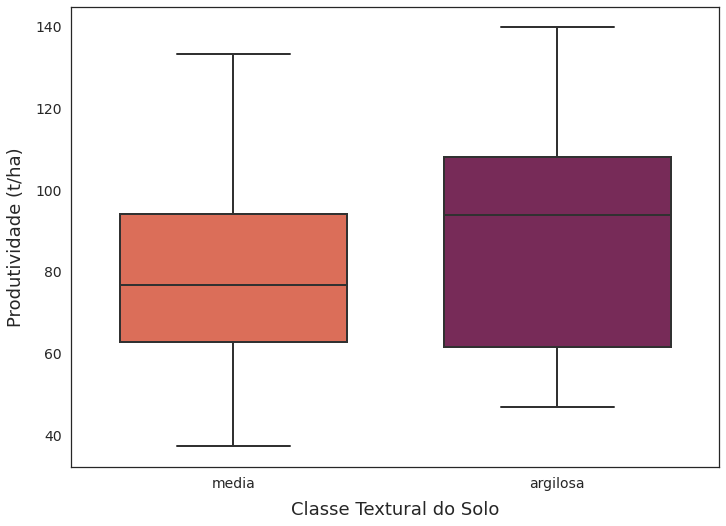

In [66]:
# AValiando a produtividade em função da textura do solo

plt.subplots(figsize=(12, 8))
#seborn
sns.set(font_scale=1,style="white")
plt.rcParams.update({'font.family':'Arial'})

# a paleta é uma configuração de cor do seaborn
boxplot = sns.boxplot(x='clsargila', y='Yield', data=df, palette='rocket_r', order=["media", "argilosa"], fliersize=3, linewidth=2, width=0.7)

# boxplot.axes.set_title("Title",fontsize=50)
boxplot.set_xlabel("Classe Textural do Solo",fontsize=18, labelpad=10)
boxplot.set_ylabel("Produtividade (t/ha)",fontsize=18, labelpad=10)
boxplot.tick_params(labelsize=14)
plt.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)

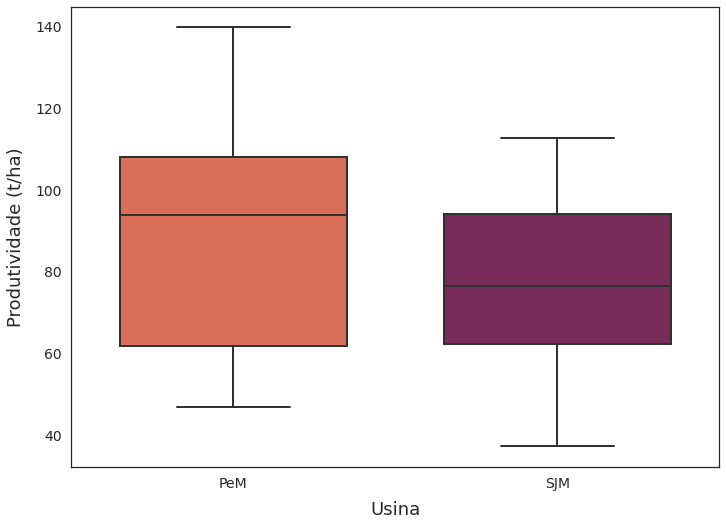

In [67]:
# AValiando a produtividade em função da textura do solo

plt.subplots(figsize=(12, 8))
#seborn
sns.set(font_scale=1,style="white")
plt.rcParams.update({'font.family':'Arial'})

# a paleta é uma configuração de cor do seaborn
boxplot = sns.boxplot(x='Mill', y='Yield', data=df, palette='rocket_r', order=["PeM", "SJM"], fliersize=3, linewidth=2, width=0.7)

# boxplot.axes.set_title("Title",fontsize=50)
boxplot.set_xlabel("Usina",fontsize=18, labelpad=10)
boxplot.set_ylabel("Produtividade (t/ha)",fontsize=18, labelpad=10)
boxplot.tick_params(labelsize=14)
plt.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)

In [68]:
# agora iremos construir uma matriz de correlação de Pearson
# Apenas matriz

df. corr()

# Mapa de Correlação
# plt.subplots(figsize=(20, 15))
# heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot = True, linecolor = 'white', linewidths = 1)

,X (m),Y (m),Elevation (m),Slope (%),Clay,Sand,Silt,OM,pH,P,...,Mg,H+Al,SEB,CEC,BS,B,Cu,Fe,Mn,Yield
X (m),1.000000,-0.999927,0.977780,-0.110938,-0.952381,0.933107,-0.334279,-0.847271,0.281841,0.418762,...,0.604236,-0.397483,0.320213,0.118375,0.466934,0.117520,-0.757674,0.817007,-0.723133,-0.258026
Y (m),-0.999927,1.000000,-0.976848,0.107991,0.951544,-0.932740,0.337038,0.846308,-0.276803,-0.418204,...,-0.602282,0.393734,-0.318930,-0.119019,-0.463958,-0.117299,0.760148,-0.817291,0.725059,0.257449
Elevation (m),0.977780,-0.976848,1.000000,-0.169357,-0.933268,0.904871,-0.263574,-0.845131,0.355953,0.408760,...,0.621563,-0.463516,0.339082,0.103207,0.516884,0.116575,-0.689077,0.795178,-0.684710,-0.261096
Slope (%),-0.110938,0.107991,-0.169357,1.000000,0.082709,-0.079285,0.017250,0.077835,-0.229786,-0.000788,...,-0.129222,0.217286,-0.076262,0.035261,-0.192003,0.003818,-0.003097,-0.058141,0.068436,0.110554
Clay,-0.952381,0.951544,-0.933268,0.082709,1.000000,-0.990923,0.426099,0.816819,-0.303836,-0.379073,...,-0.552277,0.431832,-0.297934,-0.078346,-0.473459,-0.104376,0.746137,-0.765647,0.695686,0.243781
Sand,0.933107,-0.932740,0.904871,-0.079285,-0.990923,1.000000,-0.543849,-0.796735,0.285513,0.350447,...,0.520705,-0.418589,0.274150,0.061191,0.452729,0.103862,-0.764051,0.745185,-0.702168,-0.234829
Silt,-0.334279,0.337038,-0.263574,0.017250,0.426099,-0.543849,1.000000,0.262785,-0.024716,0.007965,...,-0.056589,0.121262,0.014913,0.077279,-0.091159,-0.047393,0.484056,-0.235313,0.382548,0.058525
OM,-0.847271,0.846308,-0.845131,0.077835,0.816819,-0.796735,0.262785,1.000000,-0.266905,-0.319164,...,-0.399671,0.515474,-0.125584,0.138552,-0.374679,-0.236327,0.747092,-0.616710,0.772209,0.473492
pH,0.281841,-0.276803,0.355953,-0.229786,-0.303836,0.285513,-0.024716,-0.266905,1.000000,0.274525,...,0.522116,-0.620615,0.436498,0.120038,0.668293,0.194225,-0.178257,0.057986,-0.172120,0.013334
P,0.418762,-0.418204,0.408760,-0.000788,-0.379073,0.350447,0.007965,-0.319164,0.274525,1.000000,...,0.520605,-0.242037,0.463083,0.342321,0.385660,0.117099,-0.282896,0.393191,-0.281250,-0.153158


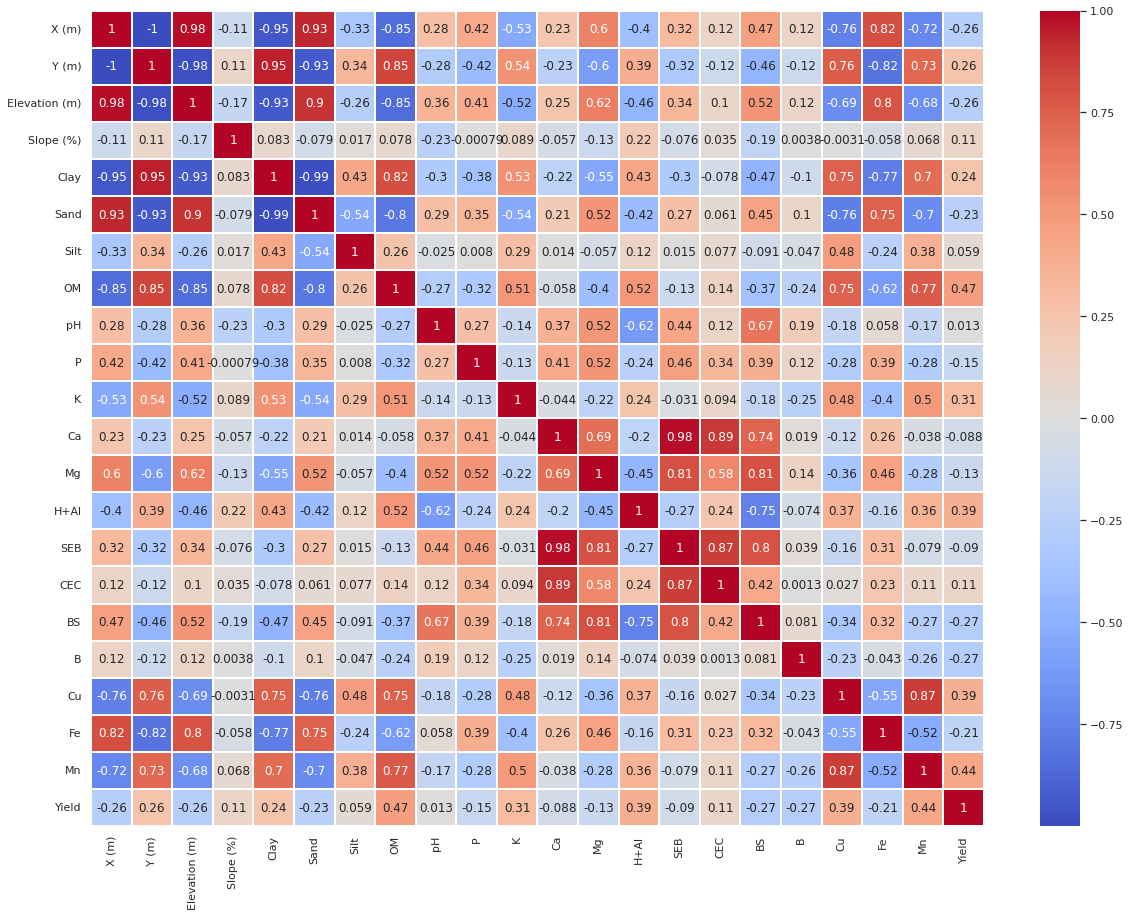

In [69]:
# agora iremos construir uma matriz de correlação de Pearson
# Apenas matriz

# df. corr()

# Mapa de Correlação
# cmap é a paleta de cores


plt.subplots(figsize=(20, 15))
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot = True, linecolor = 'white', linewidths = 1)

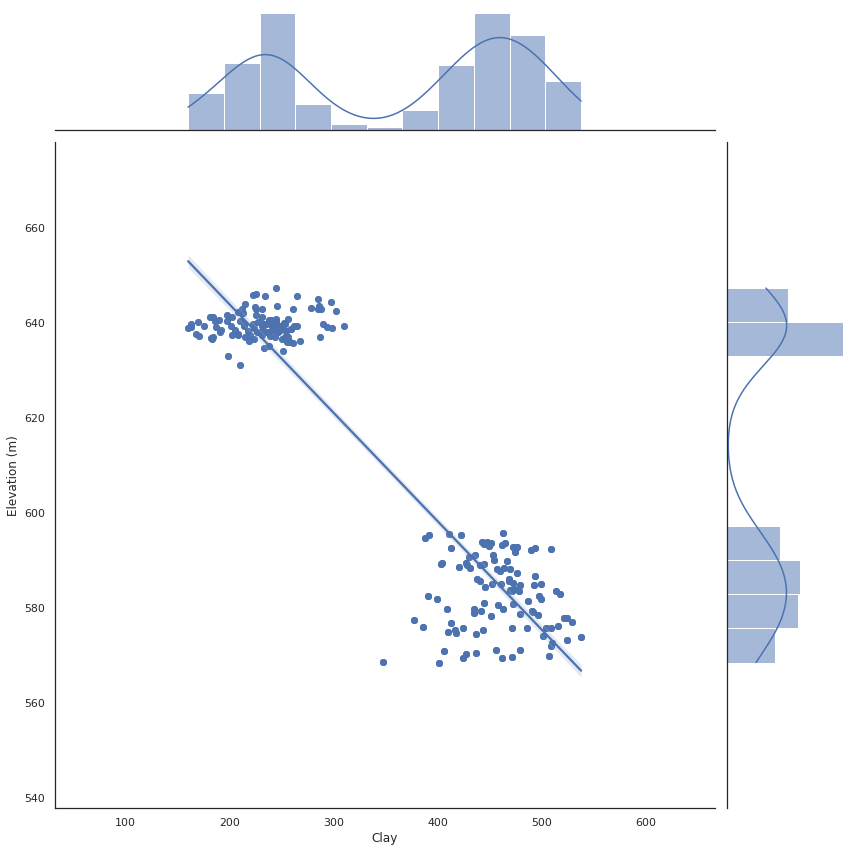

In [70]:
# Gráfico de correlação
# Areia e elevação (legal)

sns.set_style('white')
plt.rcParams.update({'font.family':'Arial'})

joinplot2 = sns.jointplot(x = 'Clay', y = 'Elevation (m)', data = df, kind = 'reg', height = 12, ratio = 5, space = 0.1)

joinplot2.plot_marginals(sns.kdeplot, color = 'b', shade = True, alpha = .2, legend = False)

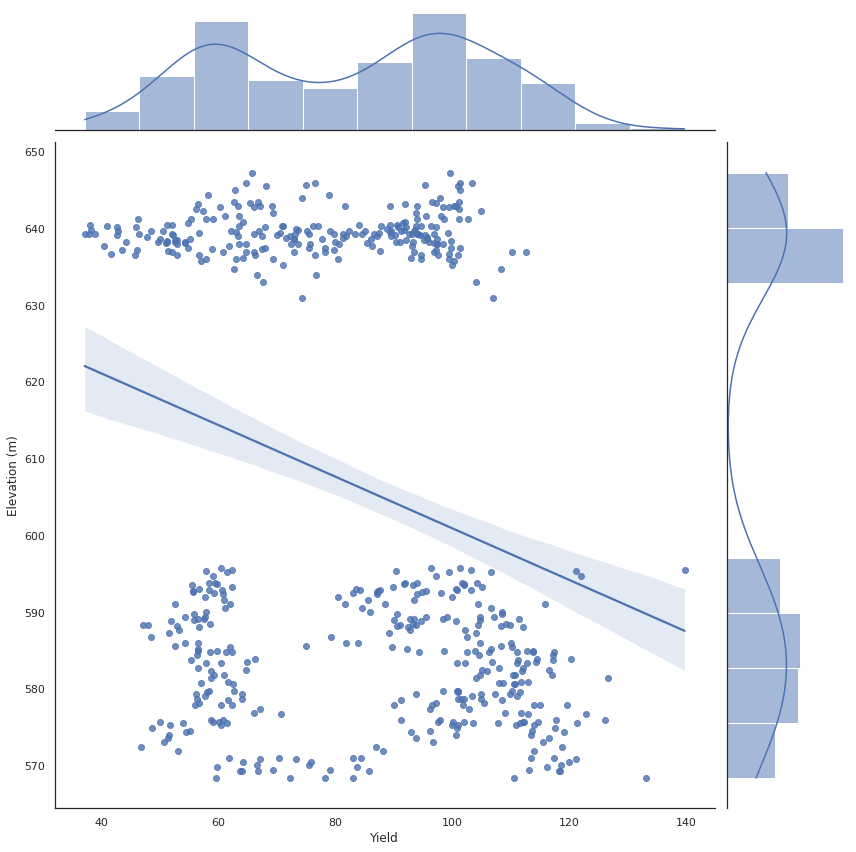

In [71]:
# Gráfico de correlação
# Produtividade e elevação (não é uma correlação boa)

sns.set_style('white')
plt.rcParams.update({'font.family':'Arial'})

joinplot2 = sns.jointplot(x = 'Yield', y = 'Elevation (m)', data = df, kind = 'reg', height = 12, ratio = 5, space = 0.1)

In [127]:
# Começando a modelar

# Dividindo em Treino e Teste
from sklearn.model_selection import train_test_split

df_x = df.drop(['Yield'], axis = 1)
df_y = df['Yield']

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, train_size = 0.7, test_size = 0.3)

In [128]:
# checando

df_x_test

,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,OM,...,Mg,H+Al,SEB,CEC,BS,B,Cu,Fe,Mn,clsargila
413,262217.144,7521731.626,645.700,15.056,SJM,Second Ratoon,234.5,691.0,74.5,13.0,...,10.0,24.0,33.5,57.5,58.0,0.600,1.6,27.0,4.1,media
165,236733.451,7645308.188,584.851,13.441,PeM,First Ratoon,452.0,456.0,92.0,24.0,...,7.0,28.0,34.3,62.3,55.0,0.270,3.4,17.0,17.0,argilosa
52,236685.828,7645011.993,582.757,10.107,PeM,Plant,517.0,380.0,103.0,29.0,...,7.0,28.0,33.4,61.2,55.0,0.120,4.2,22.0,14.5,argilosa
80,236806.628,7645448.349,589.134,8.924,PeM,Plant,444.0,414.0,142.0,35.0,...,10.0,34.0,45.2,79.5,57.0,0.150,6.5,25.0,34.4,argilosa
262,236654.080,7644814.529,580.792,10.575,PeM,Second Ratoon,472.5,444.0,83.5,22.0,...,4.0,29.0,33.0,62.0,53.0,0.900,2.0,14.0,7.4,argilosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,236735.194,7645004.055,587.727,11.665,PeM,Second Ratoon,459.5,398.0,142.5,28.0,...,10.0,28.0,47.6,75.6,63.0,0.800,1.6,17.0,13.5,argilosa
224,236563.285,7644879.769,569.821,30.558,PeM,Second Ratoon,506.5,410.0,83.5,21.2,...,6.2,28.0,31.3,59.3,53.4,0.554,3.0,12.2,12.7,argilosa
44,236622.331,7644617.065,582.387,9.480,PeM,Plant,390.5,546.0,63.5,34.0,...,5.0,31.0,30.4,61.2,50.0,0.200,3.0,29.0,10.5,argilosa
32,236636.462,7645019.930,577.836,7.215,PeM,Plant,524.0,384.0,92.0,28.0,...,6.0,31.0,24.5,55.4,44.0,0.140,4.1,18.0,15.7,argilosa


In [129]:
df_x_train

,X (m),Y (m),Elevation (m),Slope (%),Mill,Season,Clay,Sand,Silt,OM,...,Mg,H+Al,SEB,CEC,BS,B,Cu,Fe,Mn,clsargila
482,262615.851,7521766.735,638.400,3.385,SJM,Third Ratoon,192.0,742.0,66.0,9.0,...,11.0,17.0,41.5,58.5,71.0,0.36,0.9,42.0,4.2,media
498,262314.587,7521778.581,639.100,12.832,SJM,Third Ratoon,243.0,685.0,72.0,13.0,...,11.0,21.0,50.7,71.7,71.0,0.18,1.4,62.0,4.0,media
341,262233.766,7521850.470,637.200,8.481,SJM,Second Ratoon,239.0,668.0,93.0,11.0,...,8.0,24.0,31.6,55.6,57.0,0.30,1.5,64.0,5.5,media
309,236832.182,7645292.314,593.649,8.288,PeM,Second Ratoon,451.5,434.0,114.5,21.0,...,10.0,24.0,53.3,77.3,69.0,0.68,3.1,17.0,8.0,argilosa
453,262382.320,7521829.691,638.200,1.793,SJM,Third Ratoon,244.5,683.0,72.5,9.0,...,10.0,19.0,40.1,59.1,68.0,0.49,1.2,46.0,3.4,media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,262463.141,7521757.803,640.300,6.334,SJM,Third Ratoon,210.0,683.0,107.0,9.0,...,8.0,22.0,34.3,56.3,61.0,0.14,1.4,98.0,7.8,media
515,262369.853,7521740.559,637.000,7.943,SJM,Third Ratoon,287.0,588.0,125.0,12.0,...,9.0,28.0,46.4,74.4,62.0,0.19,1.5,86.0,4.0,media
356,262348.454,7521804.136,639.800,5.214,SJM,Second Ratoon,235.5,679.0,85.5,13.0,...,8.0,28.0,40.6,68.6,59.0,0.57,2.4,56.0,5.4,media
122,236602.970,7645126.599,573.969,8.617,PeM,First Ratoon,501.0,406.0,93.0,38.0,...,7.0,28.0,34.7,62.7,55.0,0.26,3.0,16.0,11.8,argilosa


In [130]:
# Criando variáveis categóricas

# dummie é como um boneco, vou transformar as variaveis categoricas em numericas
# tenho 2 usinas, não posso trabalhar com letras então eu transformo em numeros

df_x_train = pd.get_dummies(df_x_train, drop_first = True)
df_x_test = pd.get_dummies(df_x_test, drop_first = True)

In [131]:
# checando para verificar se transformou

df_x_test

,X (m),Y (m),Elevation (m),Slope (%),Clay,Sand,Silt,OM,pH,P,...,BS,B,Cu,Fe,Mn,Mill_SJM,Season_Plant,Season_Second Ratoon,Season_Third Ratoon,clsargila_media
413,262217.144,7521731.626,645.700,15.056,234.5,691.0,74.5,13.0,5.4,43.0,...,58.0,0.600,1.6,27.0,4.1,1,0,1,0,1
165,236733.451,7645308.188,584.851,13.441,452.0,456.0,92.0,24.0,5.6,26.0,...,55.0,0.270,3.4,17.0,17.0,0,0,0,0,0
52,236685.828,7645011.993,582.757,10.107,517.0,380.0,103.0,29.0,5.3,9.0,...,55.0,0.120,4.2,22.0,14.5,0,1,0,0,0
80,236806.628,7645448.349,589.134,8.924,444.0,414.0,142.0,35.0,5.2,12.0,...,57.0,0.150,6.5,25.0,34.4,0,1,0,0,0
262,236654.080,7644814.529,580.792,10.575,472.5,444.0,83.5,22.0,5.1,20.0,...,53.0,0.900,2.0,14.0,7.4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,236735.194,7645004.055,587.727,11.665,459.5,398.0,142.5,28.0,5.4,33.0,...,63.0,0.800,1.6,17.0,13.5,0,0,1,0,0
224,236563.285,7644879.769,569.821,30.558,506.5,410.0,83.5,21.2,4.9,5.8,...,53.4,0.554,3.0,12.2,12.7,0,0,1,0,0
44,236622.331,7644617.065,582.387,9.480,390.5,546.0,63.5,34.0,4.8,11.0,...,50.0,0.200,3.0,29.0,10.5,0,1,0,0,0
32,236636.462,7645019.930,577.836,7.215,524.0,384.0,92.0,28.0,5.0,9.0,...,44.0,0.140,4.1,18.0,15.7,0,1,0,0,0


In [132]:
# agora eu posso fazer meus modelos
# Aplicando o Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)

rfr.fit(df_x_train, df_y_train)

RandomForestRegressor()

In [133]:
# Aprendizado na base de Test
# Serva para verificar a acurácia do meu modelo

rfr_pred = rfr.predict(df_x_test)

In [134]:
# Avaliando  as métricas (R2)

from sklearn.metrics import r2_score

r2_score(df_y_test, rfr_pred)

0.9157724719231648

In [135]:
# Avaliando as métricas (RMSE)
# é o erro quandrado
# vai me dar uma ideia de quantas toneladas por hequitare eu estou erro

from sklearn.metrics import mean_squared_error

mean_squared_error(df_y_test, rfr_pred, squared = False)
# Squared => If true returns MSE value, if False returns RMSE value

6.4031443105256285

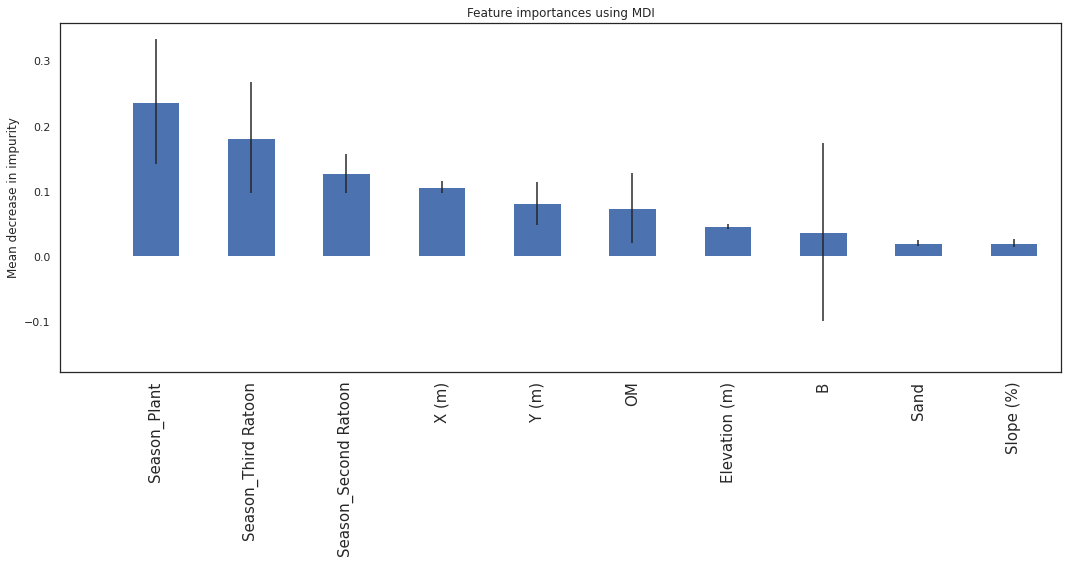

In [136]:
# Avaliando a importância das variáveis

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis = 0)

rfc_importances = pd.Series(importances, index = df_x_train.columns)
imp = rfc_importances.sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (15, 8))

imp.plot.bar(yerr = std, ax = ax)

ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')

plt.xticks(fontsize = 15)

plt.xlim([-1, 9.5])

fig.tight_layout()

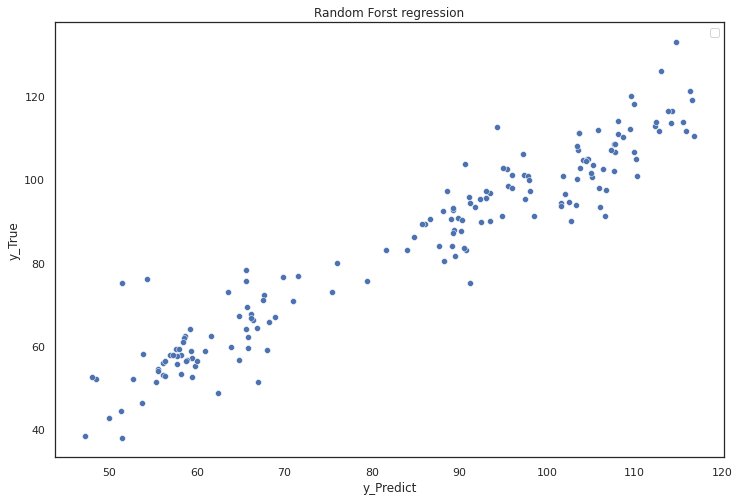

In [137]:
# Gráfico predito vs real

lw = 1.5

fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.scatterplot(x = rfr_pred, y=df_y_test, data=df_x_test)

plt.xlabel('y_Predict')
plt.ylabel('y_True')
plt.title('Random Forst regression')

plt.legend()

plt.show()

In [144]:
# Ajustando Hiperparâmetros

# ele vai fazer todas as combinações e me mostrar qual é o melhor

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True, False], 
              'max_depth': [10, 50, 100, None], 
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [100, 500, 1000, 1500]}

In [145]:
grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3)

In [146]:
grid.fit(df_x_train, df_y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 500, 1000, 1500]})

In [151]:
# Agora irei verificar quais foram os melhores parametros

grid.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 100}

In [152]:
# agora irei verificar se realmente melhorou com os novos parametros

grid_predictions = grid.predict(df_x_test)

In [153]:
# r quadrado

r2_score(df_y_test, grid_predictions)

0.9220760169483566

In [155]:
# erro

mean_squared_error(df_y_test, grid_predictions, squared =  False)

6.158881297783066